<a href="https://colab.research.google.com/github/mayang17/NN-for-computer-vision/blob/main/NN_for_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 24ms/step - accuracy: 0.2701 - loss: 2.0141 - val_accuracy: 0.3539 - val_loss: 1.7866
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.3769 - loss: 1.7304 - val_accuracy: 0.4035 - val_loss: 1.6643
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.4094 - loss: 1.6374 - val_accuracy: 0.4243 - val_loss: 1.6068
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.4380 - loss: 1.5621 - val_accuracy: 0.4320 - val_loss: 1.5840
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.4497 - loss: 1.5324 - val_accuracy: 0.4257 - val_loss: 1.6038
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.4656 - loss: 1.4841 - val_accuracy: 0.4436 - val_loss: 1.5522
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.4691 - loss: 1.4652 - val_accuracy: 0.4514 - val_loss: 1.5384
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 30s 24ms/step - accuracy: 0.4856 -

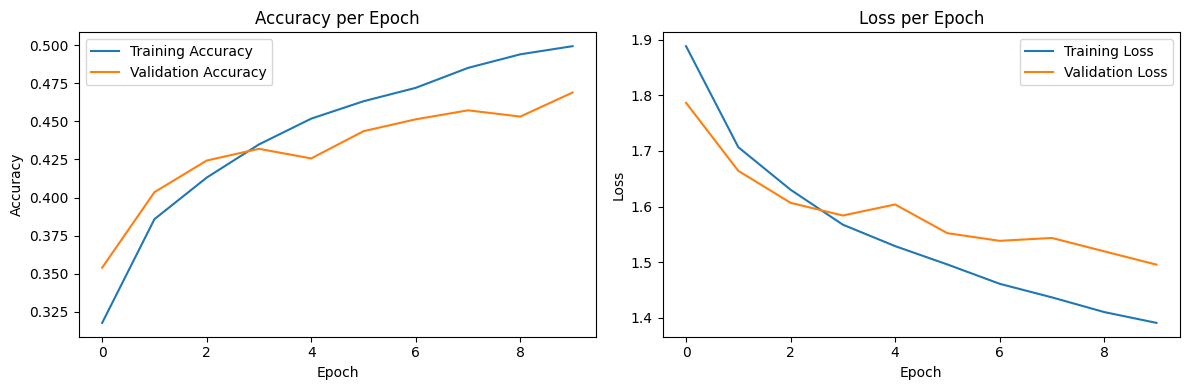

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


<ipython-input-1-7b8daec7a8a0>:66: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"True: {class_names[int(y_test[i])]}\nPred: {class_names[y_pred[i]]}")


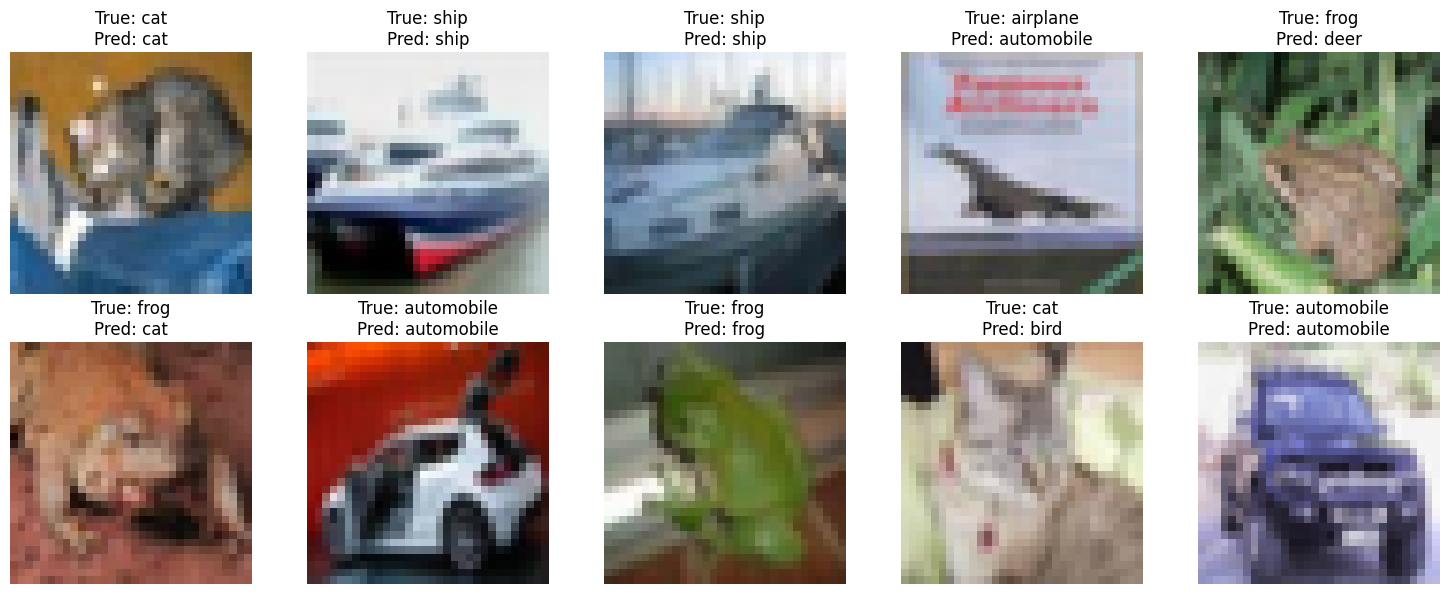

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Load dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalisasi nilai piksel dari 0-255 ke 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Membangun model MLP
model = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Pelatihan model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

# Evaluasi pada data uji
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_acc}")

# Visualisasi Akurasi & Loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Menampilkan prediksi dan label pada beberapa gambar
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(15,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[int(y_test[i])]}\nPred: {class_names[y_pred[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

